## Querying the MetaGraph index for MetaSUB

This notebook contains examples to interactively query the MetaGraph index of the MetaSUB samples provided as an example to the publication. 

First, let's import all relevant modules for data processing and plotting.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')
import os
import pickle
import json

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
matplotlib.rcParams['pdf.fonttype'] = 42 # allow for editable text in Illustrator
matplotlib.rcParams['ps.fonttype'] = 42  # allow for editable text in Illustrator
from matplotlib.pylab import cm 
import seaborn as sns

import numpy as np
import pandas as pd

Now we generate create the client object providing the hostname of the server and the port that the graph can be queried on. In our example, we will use the public metasub index instance `lab.bmi.inf.ethz.ch` running on port `42002`. This instance serves the graph built on $4,220$ MetaSUB whole metagenome sequencing samples, using k=19 as the k-mer length.

We need to install the MetaGraph API.

In [2]:
!pip install "git+https://github.com/ratschlab/metagraph.git#subdirectory=metagraph/api/python"

  Cloning https://github.com/ratschlab/metagraph.git to /private/var/folders/lt/pvgzzw5j74j2dl2qtfd68hc00000gn/T/pip-req-build-qhl8ntw0
  Created wheel for metagraph: filename=metagraph-0.1.0-py2.py3-none-any.whl size=4441 sha256=17a9b3a54e2ca74c0d7eb7c0b404988113c23c6317b8f493b4d76069ab6622e3
  Stored in directory: /private/var/folders/lt/pvgzzw5j74j2dl2qtfd68hc00000gn/T/pip-ephem-wheel-cache-t48j1tg3/wheels/27/c5/df/09f8bd5771e87b480ee2b1d8363b377b5c7732efa504ef743b
Successfully built metagraph


In [3]:
from metagraph.client import GraphClient
#metasub = GraphClient('metagraph.ethz.ch', 80, api_path='/api/metasub19')
metasub = GraphClient('lab.bmi.inf.ethz.ch', 42002)

### Get labels

After having established the graph object, we can use it to send specific queries to the server. For instance, we can receive the list of all metadata labels that are part of the graph annotation, using the `column_labels()` function.

In [4]:
lbls = metasub.column_labels()
len(lbls)

4220

### Query a single sequence

Of course, we can also query sequences against the graph - for instance this 16S rRNA sequence from E. Coli and ask in which of the samples we have seen this sequence.

In [5]:
# >ENA|A14565|A14565.1 16S rRNA
query= 'TCGAACGGTAACAGGAAGAAGCTTGCTTCTTTGCTGACGAGTGGCGGACGGGTGAGTAAT\
GTCTGGGAAACTGCCTGATGGAGGGGGATAACTACTGGAAACGGTAGCTAATACCGCATA\
ACGTCGCAAGACCAAAGAGGGGGACCTTCGGGCCTCTTGCCATCGGATGTGCCCAGATGG\
GATTAGCTAGTAGGTGGGGTAACGGCTCACCTAGGCGACGATCCCTAGCTGGTCTGAGAG\
GATGACCAGCCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGG\
GAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTT\
CGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGGAGTAAAGTTAATACCTTTGCTCATTG\
ACGTTACCCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGG\
GTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAG\
ATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCG\
TAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCG\
GTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAA\
ACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCGACTTGGAGGTTGTGCCC\
TTGAGGCGTGGCTTCCGGAGCTAACGCGTTAAGTCGACCGCCTGGGGAGTACGGCCGCAA\
GGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATT\
CGATGCAACGCGAAGAACCTTACCTGGTCTTGACATCCACAGAACTTTCCAGAGATGGAT\
TGGTGCCTTCGGGAACTGTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTTGTGAA\
ATGTTGGGTTAAGTCCCGCAACGAGCGCAACCCTTATCCTTTGTTGCCAGCGGTCCGGCC\
GGGAACTCAAAGGAGACTGCCAGTGATAAACTGGAGGAAGGTGGGGATGACGTCAAGTCA\
TCATGGCCCTTACGACCAGGGCTACACACGTGCTACAATGGCGCATACAAAGAGAAGCGA\
CCTCGCGAGAGCAAGCGGACCTCATAAAGTGCGTCGTAGTCCGGATTGGAGTCTGCAACT\
CGACTCCATGAAGTCGGAATCGCTAGTAATCGTGGATCAGAATGCCACGGTGAATACGTT\
CCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCAAAAGAAGTAGGTA\
GCTTAACCTTCGGGAGGGCGCTTACCACTTTGTGATTCATGACTGGGGTGAAGTCGTAAC\
AAGGTAACCGTAGGGGAAC'

metasub.search(query, discovery_threshold=1.0)

,kmer_count,sample,city,city_latitude,city_longitude,city_total_population,continent,latitude,longitude,metasub_name,num_reads,sample_type,station,surface_material
0,1441,haib17CEM4890_H2NYMCCXY_SL254770,offa,8.000000,4.000000,90000.0,sub_saharan_africa,8.154850,4.726465,CSD16-OFA-058,29212708.0,environmental_microbiome,None,wood
1,1441,haib17CEM4890_H2NYMCCXY_SL254771,offa,8.000000,4.000000,90000.0,sub_saharan_africa,8.154991,4.726491,CSD16-OFA-066,26851260.0,environmental_microbiome,None,rubber
2,1441,haib17CEM4890_H2NYMCCXY_SL254783,offa,8.000000,4.000000,90000.0,sub_saharan_africa,8.155661,4.724424,CSD16-OFA-067,39916804.0,environmental_microbiome,None,wood
3,1441,haib17CEM4890_H2NYMCCXY_SL254794,offa,8.000000,4.000000,90000.0,sub_saharan_africa,NaN,NaN,CSD16-OFA-060,57445076.0,environmental_microbiome,None,None
4,1441,haib17CEM4890_H2NYMCCXY_SL254806,offa,8.000000,4.000000,90000.0,sub_saharan_africa,8.154815,4.726500,CSD16-OFA-061,47393736.0,environmental_microbiome,None,other
5,1441,haib17CEM4890_H2NYMCCXY_SL254830,offa,8.000000,4.000000,90000.0,sub_saharan_africa,8.154855,4.726488,CSD16-OFA-063,29839152.0,environmental_microbiome,None,metal
6,1441,haib17CEM4890_HKC32ALXX_SL254680,ilorin,8.496640,4.542140,777667.0,sub_saharan_africa,8.484537,4.562935,CSD16-ILR-026,37125268.0,environmental_microbiome,None,metal
7,1441,haib17CEM4890_HKC32ALXX_SL254697,santiago,-33.456940,-70.648270,6310000.0,south_america,-33.519779,-70.599617,CSD16-SCL-151,48307060.0,environmental_microbiome,None,metal
8,1441,haib17CEM4890_HKC32ALXX_SL254702,tokyo,35.689499,139.691711,13839910.0,east_asia,35.600861,139.684921,CSD16-TOK-038,42573988.0,environmental_microbiome,None,vinyl
9,1441,haib17CEM4890_HKC32ALXX_SL254709,santiago,-33.456940,-70.648270,6310000.0,south_america,-33.519779,-70.599617,CSD16-SCL-157,49114744.0,environmental_microbiome,None,metal


The metadata of all matching samples is returned as a pandas data frame and can be further processed.

The above query only contains perfect matches (all k-mers of the query were also found in the graph). We can reduce the stringency (and increase sensitivity), by lowering the threshold for the fraction of kmers matches.

In the next example, we retrieve the list of samples matching at least 80% of the k-mers in the query sequence.

In [6]:
metasub.search(query, discovery_threshold=0.8)

,kmer_count,sample,city,city_latitude,city_longitude,city_total_population,continent,latitude,longitude,metasub_name,num_reads,sample_type,station,surface_material
0,1291,haib17CEM4890_H2NYMCCXY_SL254769,offa,8.000000,4.000000,90000.0,sub_saharan_africa,8.154848,4.726363,CSD16-OFA-050,24759620.0,environmental_microbiome,None,wood
1,1441,haib17CEM4890_H2NYMCCXY_SL254770,offa,8.000000,4.000000,90000.0,sub_saharan_africa,8.154850,4.726465,CSD16-OFA-058,29212708.0,environmental_microbiome,None,wood
2,1441,haib17CEM4890_H2NYMCCXY_SL254771,offa,8.000000,4.000000,90000.0,sub_saharan_africa,8.154991,4.726491,CSD16-OFA-066,26851260.0,environmental_microbiome,None,rubber
3,1201,haib17CEM4890_H2NYMCCXY_SL254772,offa,8.000000,4.000000,90000.0,sub_saharan_africa,8.156144,4.724781,CSD16-OFA-074,27529048.0,environmental_microbiome,None,metal
4,1275,haib17CEM4890_H2NYMCCXY_SL254776,rio_de_janeiro,-22.902781,-43.207500,6688930.0,south_america,-22.879198,-43.272053,OLY-DCT-2-D-080816,22647876.0,environmental_microbiome,nova_américa_del_castilho_station,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,1327,haib18CEM5526_HMGMHCCXY_SL343420,zurich,47.000000,8.000000,409241.0,europe,NaN,NaN,None,7799647.0,None,None,None
720,1441,haib18CEM5526_HMGTJCCXY_SL342622,kuala_lumpur,3.141200,101.686531,1790000.0,east_asia,NaN,NaN,None,6495768.0,None,None,None
721,1441,haib18CEM5526_HMGTJCCXY_SL342623,kuala_lumpur,3.141200,101.686531,1790000.0,east_asia,NaN,NaN,None,6334773.0,None,None,None
722,1441,haib18CEM5526_HMGW3CCXY_SL342622,kuala_lumpur,3.141200,101.686531,1790000.0,east_asia,NaN,NaN,None,6958216.0,None,None,None


### Build query over CARD database

Now let us do a more complicated query, involving several sequences. Let us take antimicrobial resistance markers as present in the CARD database (version 2.0.2). We would like to know which of them we find in the individual samples of  the MetaSUB collection. First, we load the Fasta file provided with CARD and combine it with the appropriate metadata, also part of the database.

In [7]:
seqs = []

with open('data/nucleotide_fasta_protein_homolog_model.fasta', 'r') as f:
    for line in f:
        if line[0] == '>':
            line = line[1:]
        seqs.append(line.strip())

seqs = np.array(seqs).reshape((len(seqs) // 2, 2))
seq_aro = np.array(['|'.join([_.split('|')[1], _.split('|')[4]]) for _ in seqs[:, 0]])
seqs = pd.DataFrame(seqs, index=seq_aro, columns=['header', 'seq'])

amr_metadata = pd.read_csv('data/aro_metadata.tsv', sep='\t', index_col=0)
seqs = pd.concat([seqs, amr_metadata], axis=1)

Our database now contains over 2,000 entries, combined with associated metadata:

In [8]:
seqs

,header,seq,Protein Accession,DNA Accession,AMR Gene Family,Drug Class,Resistance Mechanism,ARO Category,ARO Accession,ARO Name
id,,,,,,,,,,
GQ343019|ARO:3002999,gb|GQ343019|+|132-1023|ARO:3002999|CblA-1 [mix...,ATGAAAGCATATTTCATCGCCATACTTACCTTATTCACTTGTATAG...,ACT97415.1,GQ343019,CblA beta-lactamase,cephalosporin,antibiotic inactivation,NaN,ARO:3002999,NaN
HQ845196|ARO:3001109,gb|HQ845196|+|0-861|ARO:3001109|SHV-52 [Klebsi...,ATGCGTTATATTCGCCTGTGTATTATCTCCCTGTTAGCCGCCCTGC...,AEJ08681.1,HQ845196,SHV beta-lactamase,carbapenem;cephalosporin;penam,antibiotic inactivation,NaN,ARO:3001109,NaN
AF028812|ARO:3002867,gb|AF028812|+|392-887|ARO:3002867|dfrF [Entero...,ATGATAGGTTTGATTGTTGCGAGGTCAAAGAATAATGTTATAGGCA...,AAD01868.1,AF028812,trimethoprim resistant dihydrofolate reductase...,diaminopyrimidine antibiotic,antibiotic target replacement,NaN,ARO:3002867,NaN
JX017365|ARO:3001989,gb|JX017365|+|244-1120|ARO:3001989|CTX-M-130 [...,ATGGTGACAAAGAGAGTGCAACGGATGATGTTCGCGGCGGCGGCGT...,AFJ59957.1,JX017365,CTX-M beta-lactamase,cephalosporin,antibiotic inactivation,NaN,ARO:3001989,NaN
JN967644|ARO:3002356,gb|JN967644|+|0-813|ARO:3002356|NDM-6 [Escheri...,ATGGAATTGCCCAATATTATGCACCCGGTCGCGAAGCTGAGCACCG...,AEX08599.1,JN967644,NDM beta-lactamase,carbapenem;cephalosporin;cephamycin;penam,antibiotic inactivation,NaN,ARO:3002356,NaN
...,...,...,...,...,...,...,...,...,...,...
X92945.2|ARO:3004458,gb|X92945.2|-|8934-9582|ARO:3004458|Enterococc...,CTAAATCCAATCATCTACCCTATGAATTATATCTTGAAATTCATTC...,CAA63498.2,X92945.2,chloramphenicol acetyltransferase (CAT),phenicol antibiotic,antibiotic inactivation,NaN,ARO:3004458,NaN
AF326777.3|ARO:3004459,gb|AF326777.3|-|23980-24640|ARO:3004459|Shigel...,TTACGCCCCGCCCTGCCACTCATCGCAGTACTGTTGTAATTCATTA...,AAL08441.1,AF326777.3,chloramphenicol acetyltransferase (CAT),phenicol antibiotic,antibiotic inactivation,NaN,ARO:3004459,NaN
S48276.1|ARO:3004460,gb|S48276.1|+|478-1129|ARO:3004460|Vibrio angu...,ATGGAGTTTCGTTTGGTTGATCTGAAAACATGGAAAAGAAAAGAGT...,AAB23649.1,S48276.1,chloramphenicol acetyltransferase (CAT),phenicol antibiotic,antibiotic inactivation,NaN,ARO:3004460,NaN


Now, we use our search strategy to query all sequences in that database against the MetaSUB collection graph.

This is going to take about 1 minute.

In [9]:
%%time

### query using k-mer matching
res = metasub.search(seqs['seq'], discovery_threshold=0.95)
res

CPU times: user 1.18 s, sys: 32.5 ms, total: 1.21 s
Wall time: 20.2 s


,kmer_count,sample,city,city_latitude,city_longitude,city_total_population,continent,latitude,longitude,metasub_name,num_reads,sample_type,station,surface_material,seq_description
0,469,haib17CEM4890_H7KYMCCXY_SL273121,fairbanks,64.8378,-147.716,51926,north_america,None,None,CSD16-FAI-0729,3749399.0,environmental_microbiome,None,plastic,2
0,876,haib17CEM4890_H2NYMCCXY_SL254778,rio_de_janeiro,-22.9028,-43.2075,6.68893e+06,south_america,-22.905,-43.1909,OLY-CTR-3-D-102016,24711700.0,environmental_microbiome,central_station,None,6
1,876,haib17CEM4890_H2NYMCCXY_SL254788,rio_de_janeiro,-22.9028,-43.2075,6.68893e+06,south_america,-22.8792,-43.2721,OLY-DCT-3-D-080816,46307564.0,environmental_microbiome,nova_américa_del_castilho_station,None,6
2,876,haib17CEM4890_H2NYMCCXY_SL254789,rio_de_janeiro,-22.9028,-43.2075,6.68893e+06,south_america,-22.9241,-43.2325,OLY-SPN-2-D-080816,24919792.0,environmental_microbiome,saens_peña_station,None,6
3,876,haib17CEM4890_H2NYMCCXY_SL254790,rio_de_janeiro,-22.9028,-43.2075,6.68893e+06,south_america,-22.8792,-43.2721,OLY-DCT-2-D-102016,51004188.0,environmental_microbiome,nova_américa_del_castilho_station,None,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,630,haib17CEM4890_HKC32ALXX_SL254677,tokyo,35.6895,139.692,1.38399e+07,east_asia,35.6053,139.682,CSD16-TOK-003,36848328.0,environmental_microbiome,None,plastic,2237
2,622,haib17CEM4890_HKC32ALXX_SL254685,santiago,-33.4569,-70.6483,6.31e+06,south_america,-33.5198,-70.5996,CSD16-SCL-150,38398008.0,environmental_microbiome,None,metal,2237
3,630,haib17CEM4890_HMCMJCCXY_SL335772,fairbanks,64.8378,-147.716,51926,north_america,NaN,NaN,CSD16-FAI-0335,4570053.0,None,None,None,2237
4,630,haib18CEM5453_HNGH3CCXY_SL344576,ilorin,8.49664,4.54214,777667,sub_saharan_africa,8.48537,4.56303,None,4773322.0,None,its,metal,2237


The result only contains successful hits. The column `seq_description` contains the index of the query sequence, corresponding to this row.

#### Get binary result matrix

For easier downstream processing, we will transform the above result list `res` into a matrix form `res_matrix` that contains one row per AMR marker and one column per MetaSUB sample in our result.

In [10]:
# drop control samples
kidx = np.where([not _.endswith('control') for _ in res['city']])[0]
res = res.iloc[kidx]
# binarize results
res_aro = seqs.index[res['seq_description'].unique().astype('int')]
sample_ids = res['sample'].unique()
res_matrix = pd.DataFrame(np.zeros((res_aro.shape[0], sample_ids.shape[0]), dtype='int'),
                          index=res_aro, columns=sample_ids)
for sid in sample_ids:
    sample_idx = np.where(res['sample'] == sid)[0]
    seq_idx = res.iloc[sample_idx].seq_description.values.astype('int')
    res_matrix[sid].loc[seqs.iloc[seq_idx].index] = 1
res_matrix 

,haib17CEM4890_H7KYMCCXY_SL273121,haib17CEM4890_H2NYMCCXY_SL254778,haib17CEM4890_H2NYMCCXY_SL254788,haib17CEM4890_H2NYMCCXY_SL254789,haib17CEM4890_H2NYMCCXY_SL254790,haib17CEM4890_H2NYMCCXY_SL254797,haib17CEM4890_H2NYMCCXY_SL254810,haib17CEM4890_H2NYMCCXY_SL254823,haib17CEM4890_H2NYMCCXY_SL254825,haib17CEM4890_H2NYMCCXY_SL254827,...,haib17CEM5106_HCVMTCCXY_SL269557,haib17CEM5106_HCY5HCCXY_SL270936,haib17CEM5106_HCY5JCCXY_SL269557,haib17KIU4866_H7HJMCCXY_SL272764,haib17KIU4866_H7HJMCCXY_SL272782,haib17CEM4890_H75CGCCXY_SL263676,haib17CEM4890_H7KYMCCXY_SL273100,haib17KIU4866_H7HJMCCXY_SL272816,haib17CEM4890_H75CGCCXY_SL263685,haib17KIU4866_H7HJMCCXY_SL272812
id,,,,,,,,,,,,,,,,,,,,,
AF028812|ARO:3002867,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AF135373|ARO:3002244,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
LC004922|ARO:3001855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AY628199|ARO:3000988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AF157553|ARO:3000938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AY027589|ARO:3004239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MF543359.1|ARO:3004325,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
NG_056174.1|ARO:3004361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


For easier plotting later on, let us now also unify the result metadata per sample.

In [11]:
### assamble data frame over metadata returned from query
res_metadata = pd.DataFrame(res)
res_metadata.index = res_metadata['sample']
res_metadata = res_metadata.drop(columns=['kmer_count', 'sample', 'seq_description'])
res_metadata.sort_values('sample', inplace=True)
res_metadata = res_metadata.drop_duplicates()

And lastly, we introduce some helper functions, that make our lives easier when plotting the data.

In [12]:
### generate selection function we can use for a custom groupby
def myGroup(mdf, ind, col):
    return mdf.loc[ind, col]

def groupByRow(df, tag, func):
    return df.groupby(lambda x: myGroup(seqs, x, tag)).apply(func)

def groupByCol(df, tag, func, mincnt=0):
    dft = df.transpose()
    dft = dft.groupby(lambda x: myGroup(res_metadata, x, tag)).apply(func)
    return dft.transpose()

Using our helpers, we can now group our data both by AMR Gene Family and by city and get the distribution of different AMR Gene Families present in the individual cities.

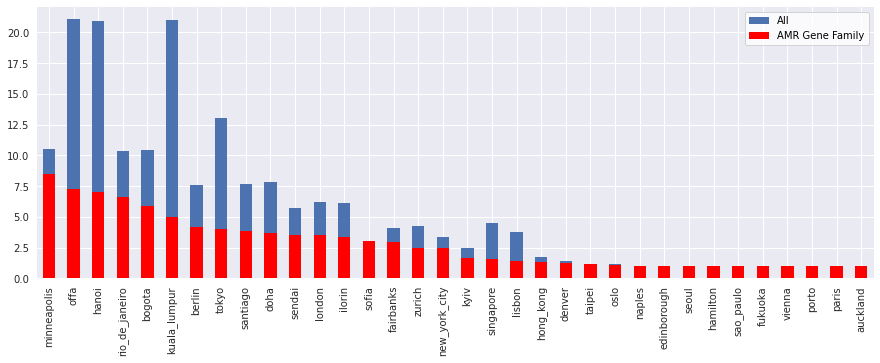

In [13]:
cdf_amr = groupByCol(groupByRow(res_matrix, 'AMR Gene Family', max), 'city', np.mean)
cdf = groupByCol(res_matrix, 'city', np.mean)
idx = cdf_amr.sum(0).sort_values(ascending=False).index
with plt.style.context('seaborn'):
    cdf.sum(0)[idx].plot(kind='bar', figsize=(15, 5), label='All')
    cdf_amr.sum(0)[idx].plot(kind='bar', color='red', label='AMR Gene Family')
plt.legend()
plt.show()

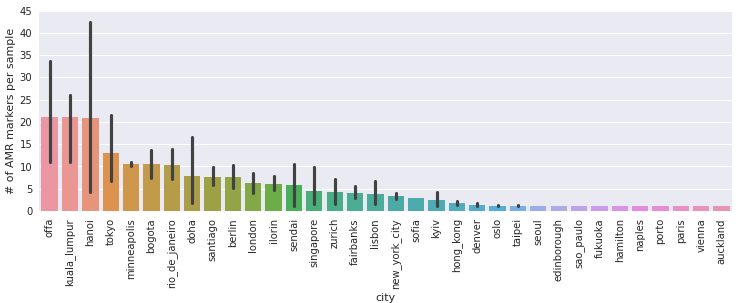

In [14]:
cdf = pd.DataFrame(res_matrix.sum(0), columns=['sum'])
cdf['city'] = res_metadata.loc[cdf.index.values, 'city']
order = cdf.groupby('city').mean()['sum'].sort_values(ascending=False).index
with plt.style.context('seaborn'):
    cax = sns.catplot(x='city', y='sum', data=cdf, kind='bar', aspect=3, height=3.5, order=order)
    cax.set_xticklabels(rotation=90)
    cax.set(ylim=(0, 45))
    cax.set(ylabel='# of AMR markers per sample')
    plt.savefig('metasub_amr_per_sample_query.pdf', format='pdf', bbox_inches='tight')

### Searching using the alignment interface

So far all our queries have been based on exact k-mer matches. We can also use MetaGraphs alignment functionality to get first find an aligment of the query sequences against the graph and then use this alignment to obtain the respective labels. This strategy will be slightly more sensitive than the exact k-mer query, but also takes a little bit longer.

First, let us align each of the sequences against the graph, using the `align()` function.

In [15]:
%%time

skip = [] #1541, 1913, 2122]
if not os.path.exists('data/aln3.pickle'):
    aln = dict()
    skipped = []
    chunksize = 50
    for i in range(0, seqs['seq'].shape[0], chunksize):
        if i in skip:
            continue
        if not i in aln:
            print('aligning chunk: %i to %i' % (i, i+chunksize))
            try:
                aln[i] = metasub.align(seqs['seq'][i:i+chunksize], discovery_threshold=0.1)
            except:
                print('skipping %i' % i)
                skipped.append(i)
                continue
        else:
            print('aligning chunk: %i to %i already completed' % (i, i+chunksize))
    pickle.dump(aln, open('data/aln3.pickle', 'wb'))
else:
    aln = pickle.load(open('data/aln3.pickle', 'rb'))
for i in aln:
    aln[i]['seq_description'] = i
aln = pd.concat(aln, axis=0)
aln.reset_index(drop=True, inplace=True)

aligning chunk: 0 to 50
aligning chunk: 50 to 100
aligning chunk: 100 to 150
aligning chunk: 150 to 200
aligning chunk: 200 to 250
aligning chunk: 250 to 300
aligning chunk: 300 to 350
aligning chunk: 350 to 400
aligning chunk: 400 to 450
aligning chunk: 450 to 500
aligning chunk: 500 to 550
aligning chunk: 550 to 600
aligning chunk: 600 to 650
aligning chunk: 650 to 700
aligning chunk: 700 to 750
aligning chunk: 750 to 800
aligning chunk: 800 to 850
aligning chunk: 850 to 900
aligning chunk: 900 to 950
aligning chunk: 950 to 1000
aligning chunk: 1000 to 1050
aligning chunk: 1050 to 1100
aligning chunk: 1100 to 1150
aligning chunk: 1150 to 1200
aligning chunk: 1200 to 1250
aligning chunk: 1250 to 1300
aligning chunk: 1300 to 1350
aligning chunk: 1350 to 1400
aligning chunk: 1400 to 1450
aligning chunk: 1450 to 1500
aligning chunk: 1500 to 1550
aligning chunk: 1550 to 1600
aligning chunk: 1600 to 1650
aligning chunk: 1650 to 1700
aligning chunk: 1700 to 1750
aligning chunk: 1750 to 1800

In [16]:
aln.iloc[0]['cigar']

'826=1D1=2X4=1I1=1X3=1X2=1X4=1I1=1X7=2X3=1X2=2I1=1X3=1X2=2I3=1I2=3I9=1X5='

We can now use the sequences resulting from alignment as query strings for exact k-mer matching.

In [17]:
%%time

### use the aligned sequences for a kmer query
res = metasub.search(aln['sequence'], discovery_threshold=0.95)
res

CPU times: user 1.36 s, sys: 176 ms, total: 1.54 s
Wall time: 35.8 s


,kmer_count,sample,city,city_latitude,city_longitude,city_total_population,continent,latitude,longitude,metasub_name,num_reads,sample_type,station,surface_material,seq_description
0,469,haib17CEM4890_H7KYMCCXY_SL273121,fairbanks,64.8378,-147.716,51926,north_america,None,None,CSD16-FAI-0729,3749399.0,environmental_microbiome,None,plastic,2
0,880,haib17CEM4890_H2NYMCCXY_SL254778,rio_de_janeiro,-22.9028,-43.2075,6.68893e+06,south_america,-22.905,-43.1909,OLY-CTR-3-D-102016,24711700.0,environmental_microbiome,central_station,None,6
1,880,haib17CEM4890_H2NYMCCXY_SL254788,rio_de_janeiro,-22.9028,-43.2075,6.68893e+06,south_america,-22.8792,-43.2721,OLY-DCT-3-D-080816,46307564.0,environmental_microbiome,nova_américa_del_castilho_station,None,6
2,880,haib17CEM4890_H2NYMCCXY_SL254789,rio_de_janeiro,-22.9028,-43.2075,6.68893e+06,south_america,-22.9241,-43.2325,OLY-SPN-2-D-080816,24919792.0,environmental_microbiome,saens_peña_station,None,6
3,880,haib17CEM4890_H2NYMCCXY_SL254790,rio_de_janeiro,-22.9028,-43.2075,6.68893e+06,south_america,-22.8792,-43.2721,OLY-DCT-2-D-102016,51004188.0,environmental_microbiome,nova_américa_del_castilho_station,None,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,642,haib17KIU4866_H7HJMCCXY_SL272776,ilorin,8.49664,4.54214,777667,sub_saharan_africa,8.45759,4.57682,CSD16-ILR-039,4388297.0,None,None,plastic,2240
3,642,haib18CEM5453_HMCMJCCXY_SL336224,hanoi,21,105,7.5878e+06,east_asia,NaN,NaN,None,3427912.0,None,None,None,2240
4,642,haib18CEM5453_HMCMJCCXY_SL336225,hanoi,21,105,7.5878e+06,east_asia,NaN,NaN,None,4956755.0,None,None,None,2240
5,642,haib18CEM5453_HMGN5CCXY_SL344618,ilorin,8.49664,4.54214,777667,sub_saharan_africa,8.15477,4.72242,None,3308019.0,None,None,metal,2240


What follows is the same as before. We transform our results into a binary matrix for easier summarization and plotting and collect the metadata of our query into a matrix:

In [18]:
# drop control samples
kidx = np.where([not _.endswith('control') for _ in res['city']])[0]
res = res.iloc[kidx]
# binarize results
res_aro = seqs.index[res['seq_description'].unique().astype('int')]
sample_ids = res['sample'].unique()
res_matrix = pd.DataFrame(np.zeros((res_aro.shape[0], sample_ids.shape[0]), dtype='int'),
                          index=res_aro, columns=sample_ids)
for sid in sample_ids:
    sample_idx = np.where(res['sample'] == sid)[0]
    seq_idx = res.iloc[sample_idx].seq_description.values.astype('int')
    res_matrix[sid].loc[seqs.iloc[seq_idx].index] = 1

In [19]:
### assamble data frame over metadata returned from query
res_metadata = pd.DataFrame(res)
res_metadata.index = res_metadata['sample']
res_metadata = res_metadata.drop(columns=['kmer_count', 'sample', 'seq_description'])
res_metadata.sort_values('sample', inplace=True)
res_metadata = res_metadata.drop_duplicates()

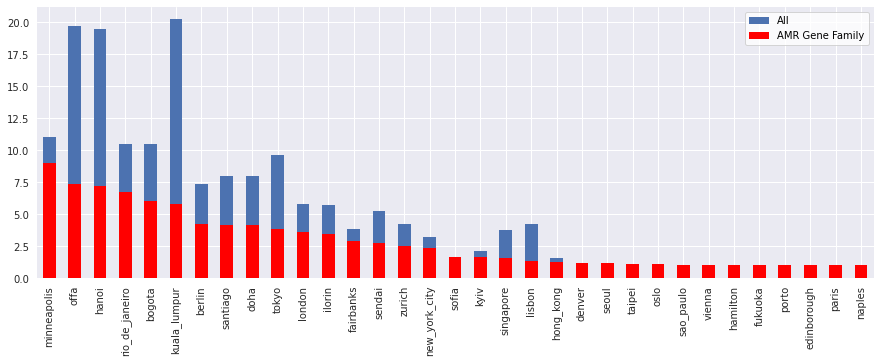

In [20]:
cdf_amr = groupByCol(groupByRow(res_matrix, 'AMR Gene Family', max), 'city', np.mean)
cdf = groupByCol(res_matrix, 'city', np.mean)
idx = cdf_amr.sum(0).sort_values(ascending=False).index
with plt.style.context('seaborn'):
    cdf.sum(0)[idx].plot(kind='bar', figsize=(15, 5), label='All')
    cdf_amr.sum(0)[idx].plot(kind='bar', color='red', label='AMR Gene Family')
plt.legend()
plt.show()

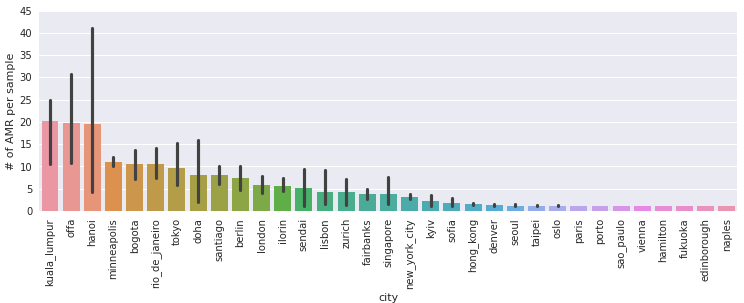

In [21]:
cdf = pd.DataFrame(res_matrix.sum(0), columns=['sum'])
cdf['city'] = res_metadata.loc[cdf.index.values, 'city']
cdf = cdf[~cdf.city.isin(['pos_control', 'neg_control', 'other_control'])]
order = cdf.groupby('city').mean()['sum'].sort_values(ascending=False).index
with plt.style.context('seaborn'):
    cax = sns.catplot(x='city', y='sum', data=cdf, kind='bar', aspect=3, height=3.5, order=order)
    cax.set_xticklabels(rotation=90)
    cax.set(ylim=(0, 45))
    cax.set(ylabel='# of AMR per sample')
    plt.savefig('metasub_amr_per_sample_align.pdf', format='pdf', bbox_inches='tight')

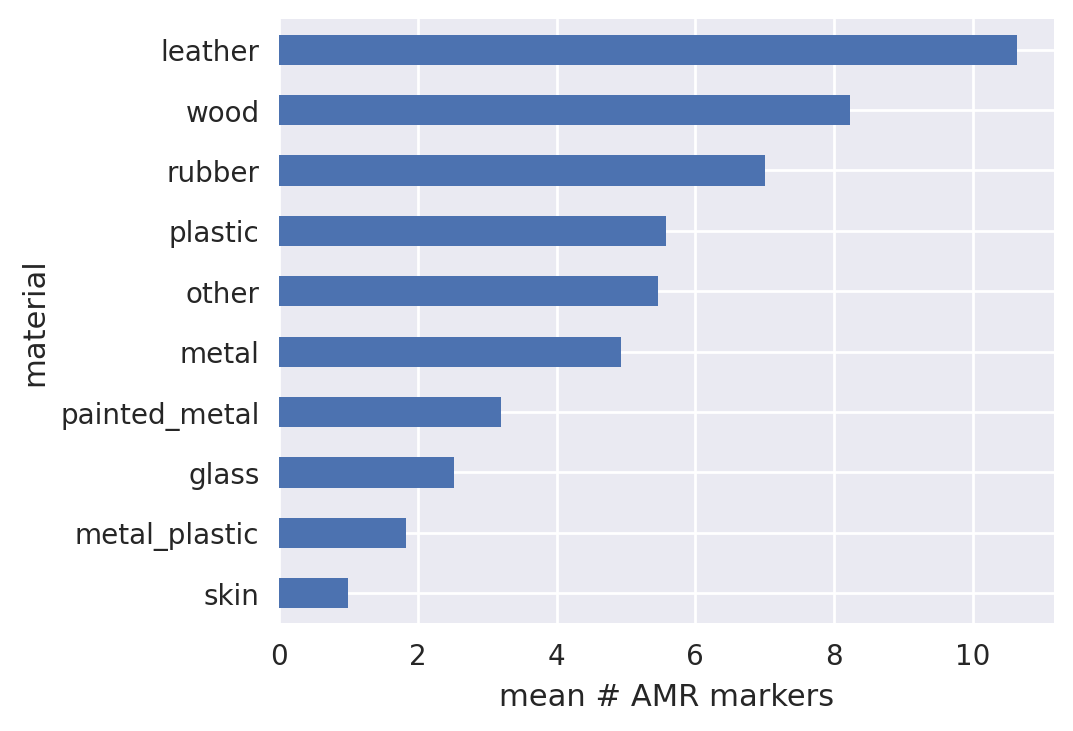

In [22]:
cdf = groupByCol(res_matrix, 'surface_material', np.mean)
cats = res_metadata['surface_material'].value_counts()
cdf = cdf[cats[cats >= 10].index]
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)
    cdf.sum(0).sort_values(ascending=True).plot(kind='barh', ax=ax)
    ax.set_xlabel('mean # AMR markers')
    ax.set_ylabel('material')
plt.savefig('metasub_amr_per_material_align.pdf', format='pdf', bbox_inches='tight')

In [23]:
cdf[cats[cats >= 10].index]

,metal,plastic,wood,glass,skin,rubber,other,metal_plastic,leather,painted_metal
id,,,,,,,,,,
AF028812|ARO:3002867,0.000000,0.015385,0.000000,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.0
AF135373|ARO:3002244,0.086667,0.046154,0.000000,0.095238,0.0,0.0000,0.000000,0.0,0.000000,0.0
AY047358|ARO:3003552,0.026667,0.000000,0.045455,0.071429,0.0,0.0625,0.153846,0.0,0.000000,0.0
AM399080|ARO:3002835,0.106667,0.015385,0.136364,0.119048,0.0,0.0625,0.000000,0.0,0.000000,0.0
FJ617207|ARO:3001800,0.000000,0.030769,0.022727,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
MG739510.1|ARO:3004444,0.000000,0.015385,0.000000,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.0
AF311385.1|ARO:3004448,0.000000,0.000000,0.022727,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.0
NC_005000.1|ARO:3004456,0.013333,0.015385,0.000000,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.0


In [24]:
res_metadata['surface_material'].value_counts()

metal                       150
plastic                      65
wood                         44
glass                        42
skin                         22
rubber                       16
other                        13
metal_plastic                12
leather                      11
painted_metal                10
stainless_steel               9
vinyl                         7
concrete                      7
human_hand                    6
air                           5
stone                         5
polyester                     5
pvc                           4
negative_control_(air)        4
fabric                        2
flesh                         2
ceramic                       2
granite                       2
tile                          2
tiles                         2
carpet                        2
metal_wood                    2
paper                         1
plastic_and_glass             1
metal_and_marble              1
control                       1
chair   

In [25]:
cdf

,metal,plastic,wood,glass,skin,rubber,other,metal_plastic,leather,painted_metal
id,,,,,,,,,,
AF028812|ARO:3002867,0.000000,0.015385,0.000000,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.0
AF135373|ARO:3002244,0.086667,0.046154,0.000000,0.095238,0.0,0.0000,0.000000,0.0,0.000000,0.0
AY047358|ARO:3003552,0.026667,0.000000,0.045455,0.071429,0.0,0.0625,0.153846,0.0,0.000000,0.0
AM399080|ARO:3002835,0.106667,0.015385,0.136364,0.119048,0.0,0.0625,0.000000,0.0,0.000000,0.0
FJ617207|ARO:3001800,0.000000,0.030769,0.022727,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
MG739510.1|ARO:3004444,0.000000,0.015385,0.000000,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.0
AF311385.1|ARO:3004448,0.000000,0.000000,0.022727,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.0
NC_005000.1|ARO:3004456,0.013333,0.015385,0.000000,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.0


In [26]:
res_matrix[res_metadata[res_metadata['city'] == 'zurich'].index.values].sum(0)

haib18CEM5526_HMGMHCCXY_SL343401    2
haib18CEM5526_HMGMHCCXY_SL343404    1
haib18CEM5526_HMGMHCCXY_SL343415    9
haib18CEM5526_HMGMHCCXY_SL343416    5
dtype: int64

In [27]:
res_matrix[res_metadata[res_metadata['city'] == 'hanoi'].index.values].sum(0)

haib18CEM5453_HMCMJCCXY_SL336214    15
haib18CEM5453_HMCMJCCXY_SL336215     6
haib18CEM5453_HMCMJCCXY_SL336216     3
haib18CEM5453_HMCMJCCXY_SL336217     5
haib18CEM5453_HMCMJCCXY_SL336218     5
haib18CEM5453_HMCMJCCXY_SL336219    10
haib18CEM5453_HMCMJCCXY_SL336224    89
haib18CEM5453_HMCMJCCXY_SL336225    92
haib18CEM5453_HMCMJCCXY_SL336226     1
haib18CEM5453_HMCMJCCXY_SL336227     1
haib18CEM5453_HMCMJCCXY_SL336228     3
haib18CEM5453_HMCMJCCXY_SL336229     3
dtype: int64